In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer


from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,roc_curve, roc_auc_score
import warnings

In [2]:
df = pd.read_csv('../../65 Years of Weather Data Bangladesh (1948 - 2013).csv')
df.head()

,No,Station_Names,YEAR,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period
0,0,Barisal,1949,1,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1949.01
1,1,Barisal,1950,1,30.0,14.1,0.0,77.0,0.453704,0.8,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1950.01
2,2,Barisal,1951,1,28.2,12.3,0.0,77.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1951.01
3,3,Barisal,1952,1,26.6,12.3,2.0,77.0,0.453704,1.0,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1952.01
4,4,Barisal,1953,1,30.0,13.3,10.0,75.0,0.453704,1.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1953.01


In [3]:
print(df['Station_Names'].unique())

['Barisal' 'Bhola' 'Bogra' 'Chandpur' 'Chittagong (City-Ambagan)'
 'Chittagong (IAP-Patenga)' 'Chuadanga' 'Comilla' "Cox's Bazar" 'Dhaka'
 'Dinajpur' 'Faridpur' 'Feni' 'Hatiya' 'Ishurdi' 'Jessore' 'Khepupara'
 'Khulna' 'Kutubdia' 'Madaripur' 'Maijdee Court' 'Mongla' 'Mymensingh'
 'Patuakhali' 'Rajshahi' 'Rangamati' 'Rangpur' 'Sandwip' 'Satkhira'
 'Sitakunda' 'Srimangal' 'Syedpur' 'Sylhet' 'Tangail' 'Teknaf']


In [4]:

# Players to be selected
li = ["Barisal","Bhola","Chandpur","Chuadanga","Dhaka","Faridpur","Ishurdi","Jessore","Khepupara","Khulna","Madaripur","Mongla","Patuakhali","Rajshahi","Tangail"]
 
df_new=df[df.Station_Names.isin(li)]
df_new

,No,Station_Names,YEAR,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period
0,0,Barisal,1949,1,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,41950,536809.80,510151.9,22.70,90.36,4,1949.01
1,1,Barisal,1950,1,30.0,14.1,0.0,77.0,0.453704,0.8,7.831915,41950,536809.80,510151.9,22.70,90.36,4,1950.01
2,2,Barisal,1951,1,28.2,12.3,0.0,77.0,0.453704,0.6,7.831915,41950,536809.80,510151.9,22.70,90.36,4,1951.01
3,3,Barisal,1952,1,26.6,12.3,2.0,77.0,0.453704,1.0,7.831915,41950,536809.80,510151.9,22.70,90.36,4,1952.01
4,4,Barisal,1953,1,30.0,13.3,10.0,75.0,0.453704,1.6,7.831915,41950,536809.80,510151.9,22.70,90.36,4,1953.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20671,20671,Tangail,2009,12,29.2,12.6,0.0,83.0,1.700000,0.7,4.000000,41909,491982.91,683166.0,24.15,89.55,10,2009.12
20672,20672,Tangail,2010,12,29.7,13.0,62.0,80.0,1.800000,1.3,6.200000,41909,491982.91,683166.0,24.15,89.55,10,2010.12
20673,20673,Tangail,2011,12,31.0,13.5,0.0,84.0,1.800000,2.3,4.700000,41909,491982.91,683166.0,24.15,89.55,10,2011.12
20674,20674,Tangail,2012,12,27.6,12.9,1.0,86.0,1.900000,1.6,3.700000,41909,491982.91,683166.0,24.15,89.55,10,2012.12


In [5]:
df_new.shape

(8640, 18)

In [6]:
df_new=df_new.drop(labels=["No","Station_Names","YEAR","Month","ALT","Station_Number"], axis=1)
df_new.head()

,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,X_COR,Y_COR,LATITUDE,LONGITUDE,Period
0,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,536809.8,510151.9,22.7,90.36,1949.01
1,30.0,14.1,0.0,77.0,0.453704,0.8,7.831915,536809.8,510151.9,22.7,90.36,1950.01
2,28.2,12.3,0.0,77.0,0.453704,0.6,7.831915,536809.8,510151.9,22.7,90.36,1951.01
3,26.6,12.3,2.0,77.0,0.453704,1.0,7.831915,536809.8,510151.9,22.7,90.36,1952.01
4,30.0,13.3,10.0,75.0,0.453704,1.6,7.831915,536809.8,510151.9,22.7,90.36,1953.01


<AxesSubplot:xlabel='Wind_Speed', ylabel='count'>

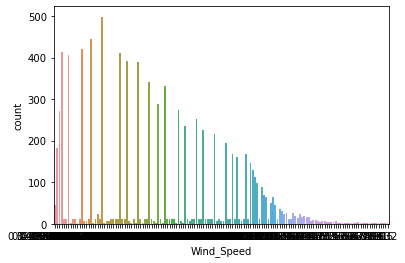

In [7]:
import seaborn as sns
sns.countplot(x = "Wind_Speed", data = df_new)

In [8]:
z = df_new["Wind_Speed"]

df_new = df_new.drop(labels=["Wind_Speed"], axis=1)
df_new['Wind_Speed'] = z
df_new.head()

,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Cloud_Coverage,Bright_Sunshine,X_COR,Y_COR,LATITUDE,LONGITUDE,Period,Wind_Speed
0,29.4,12.3,0.0,68.0,0.6,7.831915,536809.8,510151.9,22.7,90.36,1949.01,0.453704
1,30.0,14.1,0.0,77.0,0.8,7.831915,536809.8,510151.9,22.7,90.36,1950.01,0.453704
2,28.2,12.3,0.0,77.0,0.6,7.831915,536809.8,510151.9,22.7,90.36,1951.01,0.453704
3,26.6,12.3,2.0,77.0,1.0,7.831915,536809.8,510151.9,22.7,90.36,1952.01,0.453704
4,30.0,13.3,10.0,75.0,1.6,7.831915,536809.8,510151.9,22.7,90.36,1953.01,0.453704


In [9]:
X = df_new.iloc[:,:-1]
Y = df_new.iloc[:,-1]

In [10]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.2)

In [11]:
# Standard Scaler

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
scaler = sc.fit(trainX)
trainX_scaled = scaler.transform(trainX)
testX_scaled = scaler.transform(testX)

In [12]:
# MLPRegressor

from sklearn.neural_network import MLPRegressor

mlp_reg = MLPRegressor(hidden_layer_sizes=(150,100,50),
                       max_iter = 250,activation = 'relu',
                       solver = 'adam')

mlp_reg.fit(trainX_scaled, trainY)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(150, 100, 50), max_iter=250)

In [13]:
y_pred = mlp_reg.predict(testX_scaled)
df_temp = pd.DataFrame({'Actual': testY, 'Predicted': y_pred})
df_temp.head()

,Actual,Predicted
1011,1.000000,0.846080
9856,2.700000,2.977325
15271,2.400000,2.103565
11216,1.583333,1.557719
156,1.000000,1.566023


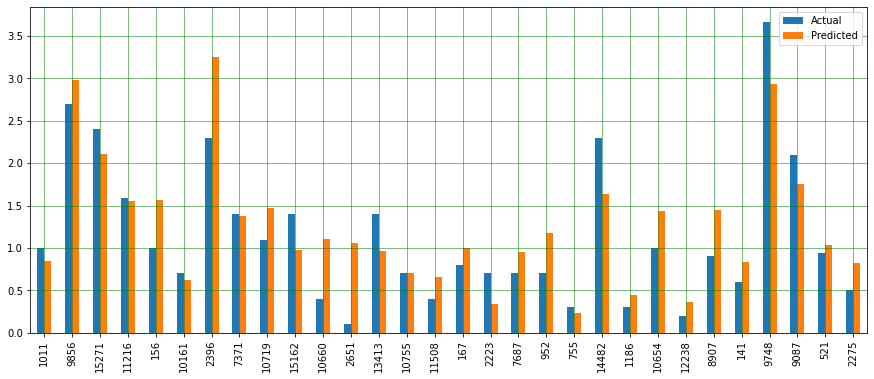

In [14]:
df_temp = df_temp.head(30)
df_temp.plot(kind='bar',figsize=(15,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
# plt.show()

Text(0, 0.5, 'Cost')

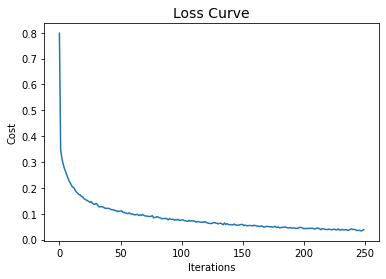

In [15]:
plt.plot(mlp_reg.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')

In [16]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(testY, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(testY, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testY, y_pred)))

Mean Absolute Error: 0.3993277978447904
Mean Squared Error: 0.37370722270845036
Root Mean Squared Error: 0.6113159761599973


In [17]:
from sklearn.metrics import r2_score
score= r2_score(testY,y_pred)
score

0.6118496109320515

In [18]:
# Hyper Parameter Tuning
param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 100],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [19]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(mlp_reg, param_grid, n_jobs= -1, cv=5)
grid.fit(trainX_scaled, trainY)

print(grid.best_params_) 

{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (150, 100, 50), 'learning_rate': 'constant', 'max_iter': 100, 'solver': 'adam'}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [20]:
grid_predictions = grid.predict(testX_scaled) 
df_temp2 = pd.DataFrame({'Actual': testY, 'Predicted': grid_predictions})
df_temp2.head()

,Actual,Predicted
1011,1.000000,1.089241
9856,2.700000,2.800459
15271,2.400000,1.912680
11216,1.583333,1.494539
156,1.000000,1.159903


In [21]:
grid_predictions = grid.predict(testX_scaled) 
df_temp2 = pd.DataFrame({'Actual': testY, 'Predicted': grid_predictions})
df_temp2.head()

,Actual,Predicted
1011,1.000000,1.089241
9856,2.700000,2.800459
15271,2.400000,1.912680
11216,1.583333,1.494539
156,1.000000,1.159903


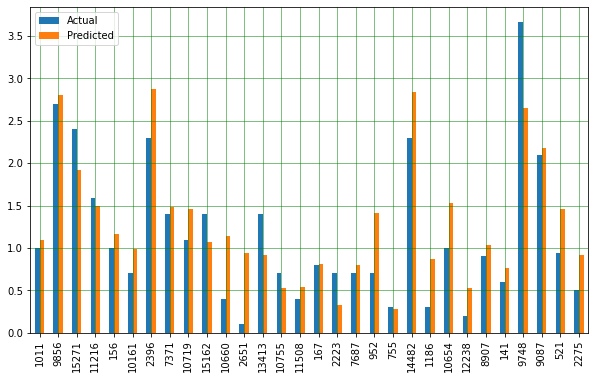

In [22]:
df_temp2 = df_temp2.head(30)
df_temp2.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
# plt.show()

In [23]:
from sklearn.metrics import r2_score
score= r2_score(testY,grid_predictions)
score

0.7199333636582723

In [24]:
print('Mean Absolute Error:', metrics.mean_absolute_error(testY, grid_predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(testY, grid_predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testY, grid_predictions)))

Mean Absolute Error: 0.3504487129743534
Mean Squared Error: 0.269645291588881
Root Mean Squared Error: 0.5192738117687825
